<h1 align=center><font size=6>Data Bootcamp</font></h1>
<h2 align=center><font size=6>Fall 2021</font></h2>
<h2 align=center><font size=6>Assignment 3</font></h2>

<hr>

<h2 align = "center">Names and NetIDs: </h2>
<h3 align = "center"> Names: Brandon Gao, Siegrid Tuttle, Michael Xu </h3>
<h3 align = "center"> NetIDs: bsg9679, sgt2559, tx542 </h3>

In [1]:
# NOTE: be sure to run the import statements first, before anything else... 
# import the relevant libraries 
import pandas as pd
import numpy as np
from plotnine import *
import plotnine
# set the plotnine figure size
plotnine.options.figure_size = (8, 6)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# KNN
from sklearn.neighbors import KNeighborsRegressor as knn
# Random Forests
from sklearn.ensemble import RandomForestRegressor as rf
# Train-Test Split, Cross-Validation
from sklearn.model_selection import train_test_split, cross_val_score

# KNN - Classification
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
# Random Forests - Classifier
from sklearn.ensemble import RandomForestClassifier as rf_clf

# ROC-AUC Curves
from sklearn.metrics import RocCurveDisplay, roc_curve, auc, roc_auc_score, precision_recall_curve

# Data Imbalance
from sklearn.utils import resample

# LogisticRegression and PCA - Dimension Reduction
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# filter out unnecessary warnings... 
import warnings
warnings.filterwarnings('ignore')

### Problem 1:
Predicting prices: Using any of the methods for prediction you have learned (With the exception of linear regression!) , use the dataset in this Kaggle page:
https://www.kaggle.com/altavish/boston-housing-dataset
and find a good **prediction model for the the median value of housing (MEDV)**. The variables in the dataset are as follows

- **CRIM**: Per capita crime rate by town
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft
- **INDUS**: Proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**: Nitric oxide concentration (parts per 10 million)
- **RM**: Average number of rooms per dwelling
- **AGE**: Proportion of owner-occupied units built prior to 1940
- **DIS**: Weighted distances to five Boston employment centers
- **RAD**: Index of accessibility to radial highways
- **TAX**: Full-value property tax rate per 10,000
- **PTRATIO**: Pupil-teacher ratio by town
- **B**: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- **LSTAT**: Percentage of lower status of the population
- **MEDV**: Median value of owner-occupied homes in $1000s

Make sure to deal with **null values** and find the **best hyperparameters** you can for your choice of model (use train/test split or crossvalidation). Watch out for **outliers**!

<hr>

As also mentioned by the Professor, let us start by taking a look at some descriptive statistics of the column variables in the DataFrame for this question:

In [2]:
df_p1 = pd.read_csv("HousingData.csv")
df_p1.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
df_p1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df_p1.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Actually, let us also graph the **histogram (overlaid with KDE estimation line) for each of our column variables** (which are, fortuitously, properly recognized by Pandas as numeric data types):

In [5]:
def make_hist(var_x_label, df):
    '''
    A function that can make a histogram, overlaid with KDE 
    estimation line, for the given column label (corresponding 
    to a column variable) of the given DataFrame.
    '''
    obj = (ggplot(df.dropna(subset = [var_x_label]), aes(x = var_x_label)) 
           + geom_histogram(aes(y = "stat(density)"), alpha = 0.5, fill = "green")
           + geom_density(color = "red", alpha = 0.5)
           + ggtitle('Histogram for the Density Distribution of "{}" with KDE Line'\
                     .format(var_x_label))
           + ylab("Density")
           + xlab(var_x_label)
           + theme_bw())
    
    return obj

In [6]:
for x_var in df_p1.columns:
    make_hist(x_var, df_p1).save("p_1_hist/hist_{}.png".format(x_var))

Feel free to go to our `"p_1_hist"` subdirectory to check out the histogram for each of the column variables. We will embed the following histograms, as the corresponding column variables seem to have **issues of significant outliers**:

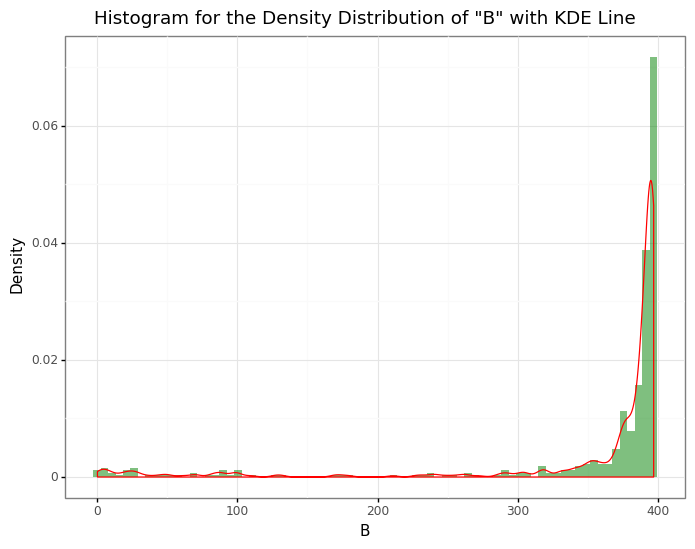

<ggplot: (304338875)>

In [7]:
make_hist("B", df_p1)

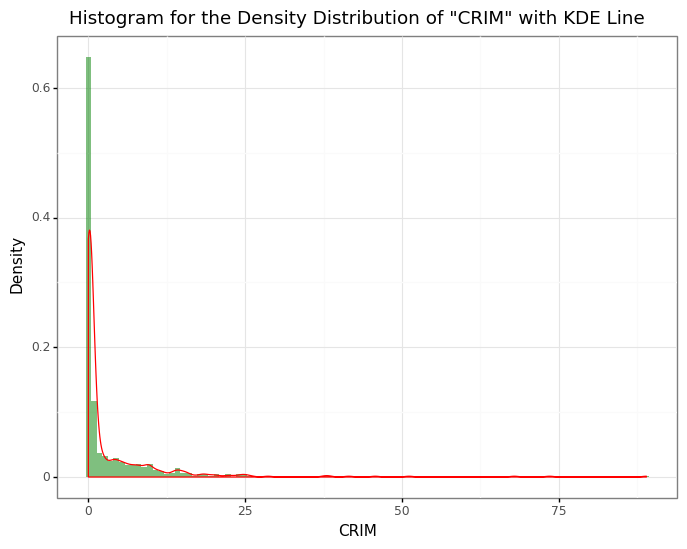

<ggplot: (304700986)>

In [8]:
make_hist("CRIM", df_p1)

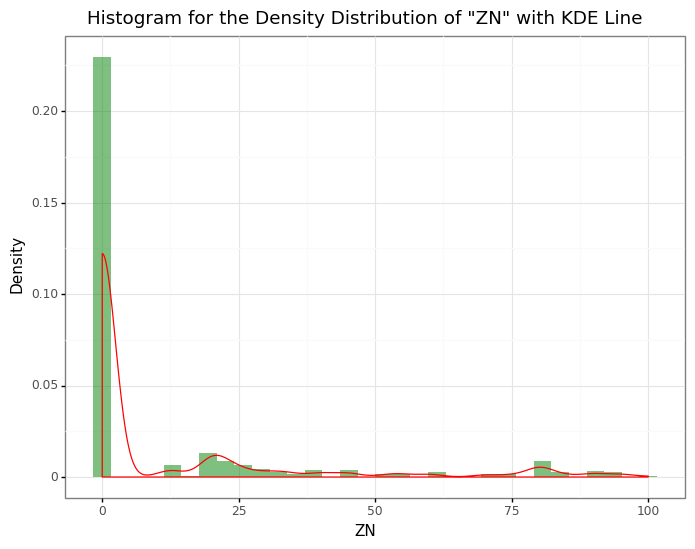

<ggplot: (275609869)>

In [9]:
make_hist("ZN", df_p1)

Now, what if we **bin those variables suffering from significant outliers (which are otherwise continuous) and see how representative each interval can be of the total variation for a given variable**!

Let us start by defining a function that can plot pie charts. We will also define transformative functions that can bin the continuous variables below.

In [10]:
def plot_pie(var_name, df, custom_colors = None):
    '''
    A function that can make a pie chart for the given column label 
    (corresponding to a column variable) of the given DataFrame
    '''
    plt.clf() # clear any previous figure window
    plt.figure(figsize = (8, 6), dpi = 100) # set figure size
    plt.pie(df[var_name].value_counts(), 
            labels = df[var_name].value_counts().index,
            autopct = '%.2f%%', # customized colors below:
            colors = ["red", "blue", "orange", "green", "lightskyblue", "gold"],
            wedgeprops = {"alpha": 0.4}) # increase transparency for visual effects
    plt.title('Pie Chart of "{}"'.format(var_name))
    plt.axis('equal')
    return plt

After some detailed discussions, we have unanimously decided that we will **deal with those variables with significant outliers** (as illustrated above in the **histograms**, as well as below in the **pie charts** \[of binned column variables\]) by:

- In models that use **B**, **rows with values under 300 will be dropped** because they represent a few outliers, not the bulk of the data (as shown in the pie chart below):

In [11]:
def categorize_B(B_value):
    if B_value < 100:
        return '0-100'
    elif 100 <= B_value < 200:
        return "100-200"
    elif 200 <= B_value < 300:
        return "200-300"
    elif 300 <= B_value <= 400:
        return "300-400"

df_p1['B_by_range'] = df_p1['B'].apply(lambda x: categorize_B(x))

<Figure size 432x288 with 0 Axes>

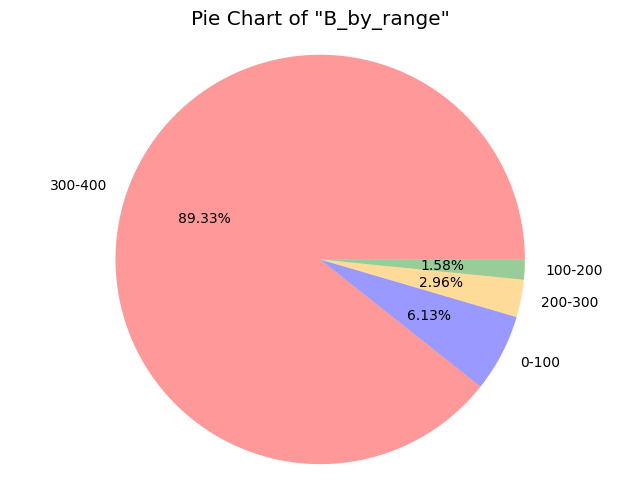

In [12]:
plot_pie("B_by_range", df_p1);

- In models that use **CRIM**, **all rows above 25 will be dropped** because they represent a few outliers, not the bulk of the data (as shown in the pie chart below):

In [13]:
def categorize_CRIM(CRIM_value):
    if CRIM_value < 25:
        return '0-25'
    elif 25 <= CRIM_value < 50:
        return "25-50"
    elif 50 <= CRIM_value < 75:
        return "50-75"
    elif 75 <= CRIM_value <= 100:
        return "75-100"

df_p1['CRIM_by_range'] = df_p1['CRIM'].apply(lambda x: categorize_CRIM(x))

<Figure size 432x288 with 0 Axes>

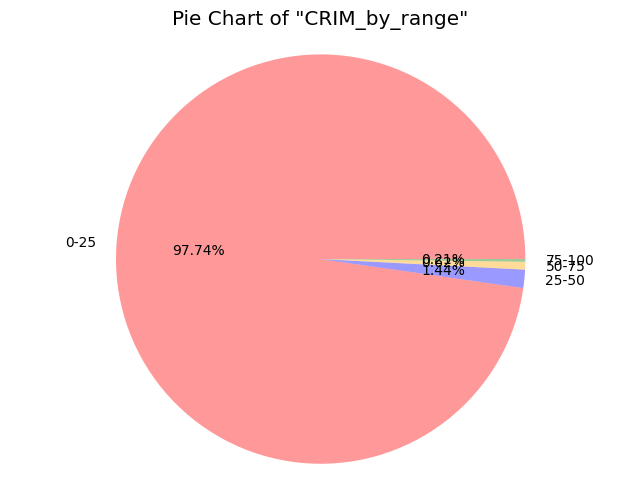

In [14]:
plot_pie("CRIM_by_range", df_p1);

- **Not using ZN**: As shown above, the vast majority of neighborhoods have no or few lots zoned for more than 25,000 acres, so there is **not enough variation for it to be a useful variable in our models**.

In [15]:
def categorize_ZN(ZN_value):
    if ZN_value == 0:
        return '0'
    elif 0 < ZN_value < 25:
        return '0(Exclusive)-25'
    elif 25 <= ZN_value < 50:
        return "25-50"
    elif 50 <= ZN_value < 75:
        return "50-75"
    elif 75 <= ZN_value <= 100:
        return "75-100"

df_p1['ZN_by_range'] = df_p1['ZN'].apply(lambda x: categorize_ZN(x))

<Figure size 432x288 with 0 Axes>

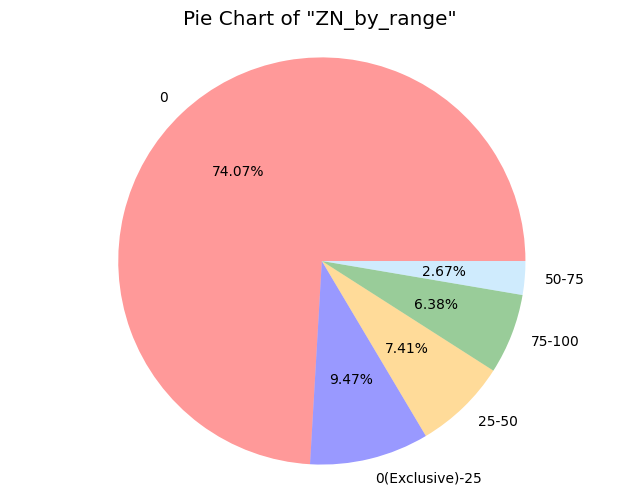

In [16]:
plot_pie("ZN_by_range", df_p1);

Also, with regard to how we will deal with observations with `np.NaN`, we will **only drop the observations that have `np.NaN` in the column variables that are specifically used for a model** (i.e. we want to make sure that the data we are passing into a model for fitting does not contain any `np.NaN`, while trying to preserve as many observations as possible).

In [17]:
# let us start by getting rid of the outliers, as specified above
df_p1_new = df_p1[(df_p1["B"] >= 300) 
                  & (df_p1["CRIM"] <= 25)]\
.drop(columns = ['ZN', 'ZN_by_range', 'B_by_range', 'CRIM_by_range'])

In [18]:
df_p1_new

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Because our group tackled the second question first (as it involves classification models, which we learned more recently about and appeared more interesting to us), we had gained more experiences with regards to the procedural approaches to these types of questions.

Before formulating our **potential models based on our understanding of pertinent socioeconomic theories related to the market pricing of housing (as assets)**, we will firstly define **a function, `predict_MEDV` that will perform all the necessary analyses with our inputs** of model name (`model_num`), pandas DataFrame (`df`), list of X-variables (`var_labels`), Y-variable to be explained/predicted (`y_label`), a range within which the optimal hyperparameter shall be found (`min_param`, `max_param`, and `inc_param`), choice of regressor object (e.g. `knn` or `rf`) through the input `regressor_obj`, the name of the approach (`approach_name`), as well as optional arguments specifying the number of CV groups (`num_cv`) and whether PCA dimension-reduction shall be used on the X-variables (`is_PCA` and `PCA_param`).

In [19]:
def predict_MEDV(model_num, df, var_labels, y_label, min_param, 
                 max_param, inc_param, regressor_obj, approach_name,
                 num_cv = 5, is_PCA = False, PCA_param = 1.0):
    '''
    (c) Brandon Gao (bsg9679), Siegrid Tuttle (sgt2559), and Michael Xu (tx542)
    Data Bootcamp | Fall 2021 | NYU Stern
    
    -------------------------------------------------------------------------------------
    
    This function takes in the parameters:
    - model_num: the model number (ordinal),
    - df: a Pandas DataFrame (`df`),
    - var_labels: a list-like/iterable container object (`var_labels`) listing the 
    column labels that shall be used as the explanatory variable,
    - y_label: a column label that is the explained variable (y variable/label),
    - a customizable range to find the optimal hyperparameter, where
        - min_param is the lower bound,
        - max_param is the upper bound (not inclusive),
        - inc_param is the increment
    - regressor_obj: the regressor object to use in this function (rf or knn, for Problem 1),
    - approach_name: name of the approach (regressor object),
    - num_cv: a customizable number of cross-validation groups (default is 5),
    - is_PCA: boolean input to indicate whether PCA will be used,
    - PCA_param: parameter to pass into the PCA object, only needed if is_PCA is True
    
    It will then use the approach passed into the function through regressor_obj, 
    with the optimal hyperparameter that has the maximum
    cross-validation score, to construct the optimal regressor object.
    
    It will then conduct a random train-test split, and
    print the test fit score.
    
    * Note that all random_state is 0, for the purpose of replicability.
    '''
    
    # some user input checks...
    
    # DataFrame data type
    if (type(df) != pd.core.frame.DataFrame):
        print('Dataset is not a Pandas DataFrame object!')
        return None
    
    # checks for the existence of x labels
    if [(item in df.columns) for item in var_labels].count(True)\
    < len(var_labels):
        print('Not all explanatory variables are in the given DataFrame!')
        return None
        
    # and also for the y label 
    if (type(y_label) != str) or (y_label not in df.columns):
        print('Invalid y label!')
        return None
    
    # also for the num_cv optional input
    if (type(num_cv) != int):
        print('Invalid CV number! Function will proceed with the default value, 5.')
        num_cv = 5
        
    # only drop na for the col vars to be used to fit models
    # to preserve as many obs as necessary/possible
    all_drop_var = var_labels + [y_label]
    SUB_DF = df[all_drop_var].dropna()
    
    # ensure that not `too many` rows were dropped by reporting shape[0]
    print("The number of observations in the given DataFrame is: {:.0f}".\
         format(df.shape[0]))
    print("The valid number of observations left is: {:.0f}\n".\
         format(SUB_DF.shape[0]))
    
    
    # determine whether PCA will be used  
    if is_PCA:
        
        # standardize the explanatory variables 
        # (as indicated by the labels)

        X_vars_st = StandardScaler().fit_transform(SUB_DF[var_labels])
        
        # construct the PCA object and transform the X variables
        # according to the rule as specified in the PCA_param
        pca_obj = PCA(PCA_param).fit(X_vars_st)
        X_VARS = pca_obj.transform(X_vars_st)
        
        print("As instructed, PCA transformation is used on the given X labels.")
        print("{:.2f}% of all variations of the X labels is preserved.\n".\
             format(PCA_param * 100))
    
    else:
        # if PCA is not used: 
        
        # only drop na for the col vars to be used to fit models
        # to preserve as many obs as necessary/possible
        X_VARS = SUB_DF[var_labels]
        
    
    # --->>> use CV, experiment with the hyperparameter, within the given range <<<---
    score_array = [cross_val_score(regressor_obj(i), 
                                   X = X_VARS, 
                                   y = SUB_DF[y_label], 
                                   cv = num_cv).mean() for i \
                   in range(min_param, max_param, inc_param)]

    # construct the df to record the score and corresponding hyperparameter (n_neighbors)
    cv_df = pd.DataFrame(score_array, columns = ['score'])
    cv_df['hyperparameter'] = list(range(min_param, max_param, inc_param))

    # let us find the entry with the maximum cv score
    # and the corresponding hyperparameter
    opt_obs = cv_df.loc[cv_df['score'] == cv_df['score'].max()]
    opt_param = int(opt_obs['hyperparameter'].iloc[0, ])
    # take the first optimal parameter, in case that there are multiple
    
    # report the optimal hyperparameter and CV score:
    print("Using the {} approach, the optimal hyperparameter is: {} (within the range of ({},{},{}).\n"\
          .format(approach_name, opt_param, min_param, max_param, inc_param))
    print("And the optimal CV score is: {:.4f}.\n".\
         format(float(opt_obs['score'].iloc[0, ])))
    
    # --->>> make the optimal prediction, using a train-test split <<<--- 
    # shuffle and split training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_VARS, 
                                                        SUB_DF[y_label], 
                                                        test_size = 0.2,
                                                        random_state = 0)

    # use the optimal hyperparameter, fit the train data, 
    # obtain score using the test ("never-seen-before") data
    train_score = regressor_obj(opt_param).fit(X = X_train, y = Y_train)\
    .score(X = X_train, y = Y_train)
    test_score = regressor_obj(opt_param).fit(X = X_train, y = Y_train)\
    .score(X = X_test, y = Y_test)
    
    # --->>> report the train-train and train-test scores as derived above  <<<---
    
    print('''Using the {} approach, based on a random train-test split (using random_state = 0):\n'''\
         .format(approach_name))
    print("The score, fitted on the train data, of the train data is: {:4f};"\
         .format(train_score))
    print("The score, fitted on the train data, of the test data is: {:4f}.\n"\
         .format(test_score))
    
    # line of division
    print('-'*90 + '\n')
    
    return {'model_num': model_num,
            'model_approach': approach_name,
            'opt_hyperparam': opt_param,
            'opt_cv_score': float(opt_obs['score'].iloc[0, ]),
            'train_train_score': train_score,
            'train_test_score': test_score}

In [20]:
# use this command to learn more about our function
# (we have our own customized docstring!)
predict_MEDV?

# we reserve copyright of this function (to the extent available/applicable)
# and may use it in our final project

# (c) Brandon Gao (bsg9679), Siegrid Tuttle (sgt2559), and Michael Xu (tx542)
# Data Bootcamp | Fall 2021 | NYU Stern

In [21]:
MEDV_all_recs = [] # also, a container 
# to keep track of all the records of experiments with 
# different models and approaches 

### Infrastructure Model:

Our first model is based on the infrastructure of the neighborhood: benefits of its geographic location, land use, age of buildings, and other factors that have to do with the physical space of the neighborhood: 
 
- **INDUS**: Proportion of non-retail business acres per town       
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)     
- **AGE**: Proportion of owner-occupied units built prior to 1940        
- **DIS**: Weighted distances to five Boston employment centers          
- **RAD**: Index of accessibility to radial highways            

In [22]:
MEDV_all_recs.append(predict_MEDV("Infrastructure", df_p1_new, 
             ["INDUS", "CHAS", "AGE", "DIS", "RAD"],
             "MEDV", 1, 401, 1, knn, "KNN"))

The number of observations in the given DataFrame is: 431
The valid number of observations left is: 381

Using the KNN approach, the optimal hyperparameter is: 76 (within the range of (1,401,1).

And the optimal CV score is: -0.6605.

Using the KNN approach, based on a random train-test split (using random_state = 0):

The score, fitted on the train data, of the train data is: 0.203016;
The score, fitted on the train data, of the test data is: 0.049346.

------------------------------------------------------------------------------------------



In [23]:
MEDV_all_recs.append(predict_MEDV("Infrastructure", df_p1_new, 
             ["INDUS", "CHAS", "AGE", "DIS", "RAD"],
             "MEDV", 100, 201, 1, rf, "RF"))

The number of observations in the given DataFrame is: 431
The valid number of observations left is: 381

Using the RF approach, the optimal hyperparameter is: 136 (within the range of (100,201,1).

And the optimal CV score is: -0.6454.

Using the RF approach, based on a random train-test split (using random_state = 0):

The score, fitted on the train data, of the train data is: 0.926759;
The score, fitted on the train data, of the test data is: 0.163883.

------------------------------------------------------------------------------------------



### Demand Model 

For our second model, we will utilize the following explanatory variables that may influence the willingness aspect of consumers' demand for a particular housing option. The variables range from utility considerations to safety and life quality ones. 

- **CRIM**: Per capita crime rate by town                                                 
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)                                    
- **RM**: Average number of rooms per dwelling                                 
- **DIS**: Weighted distances to five Boston employment centers                           
- **RAD**: Index of accessibility to radial highways                          
- **PTRATIO**: Pupil-teacher ratio by town

In [24]:
MEDV_all_recs.append(predict_MEDV("Demand", df_p1_new, 
             ["CRIM", "CHAS", "RM", "DIS", "RAD", "PTRATIO"],
             "MEDV", 1, 401, 1, knn, "KNN"))

The number of observations in the given DataFrame is: 431
The valid number of observations left is: 414

Using the KNN approach, the optimal hyperparameter is: 13 (within the range of (1,401,1).

And the optimal CV score is: -0.2420.

Using the KNN approach, based on a random train-test split (using random_state = 0):

The score, fitted on the train data, of the train data is: 0.565045;
The score, fitted on the train data, of the test data is: 0.530898.

------------------------------------------------------------------------------------------



In [25]:
MEDV_all_recs.append(predict_MEDV("Demand", df_p1_new, 
             ["CRIM", "CHAS", "RM", "DIS", "RAD", "PTRATIO"],
             "MEDV", 100, 201, 1, rf, "RF"))

The number of observations in the given DataFrame is: 431
The valid number of observations left is: 414

Using the RF approach, the optimal hyperparameter is: 106 (within the range of (100,201,1).

And the optimal CV score is: 0.1719.

Using the RF approach, based on a random train-test split (using random_state = 0):

The score, fitted on the train data, of the train data is: 0.950778;
The score, fitted on the train data, of the test data is: 0.753863.

------------------------------------------------------------------------------------------



### Demographic Model

Our third model investigates the demographic factors of the immediate environment (neighborhood/town) of the housing asset, which might also affect consumers' demand (mostly through negative externality, impacting their willingness to purchase). 

- **CRIM**: Per capita crime rate by town
- **NOX**: Nitric oxide concentration (parts per 10 million)
- **PTRATIO**: Pupil-teacher ratio by town
- **B**: 1000(Bk — 0.63)², where Bk is the proportion of \[people of African American descent\] by town
- **LSTAT**: Percentage of lower status of the population


In [26]:
MEDV_all_recs.append(predict_MEDV("Demographic", df_p1_new, 
             ["CRIM", "NOX", "PTRATIO", "B", "LSTAT"],
             "MEDV", 1, 401, 1, knn, "KNN"))

The number of observations in the given DataFrame is: 431
The valid number of observations left is: 411

Using the KNN approach, the optimal hyperparameter is: 14 (within the range of (1,401,1).

And the optimal CV score is: 0.3696.

Using the KNN approach, based on a random train-test split (using random_state = 0):

The score, fitted on the train data, of the train data is: 0.666974;
The score, fitted on the train data, of the test data is: 0.655857.

------------------------------------------------------------------------------------------



In [27]:
MEDV_all_recs.append(predict_MEDV("Demographic", df_p1_new, 
             ["CRIM", "NOX", "PTRATIO", "B", "LSTAT"],
             "MEDV", 100, 201, 1, rf, "RF"))

The number of observations in the given DataFrame is: 431
The valid number of observations left is: 411

Using the RF approach, the optimal hyperparameter is: 128 (within the range of (100,201,1).

And the optimal CV score is: 0.4939.

Using the RF approach, based on a random train-test split (using random_state = 0):

The score, fitted on the train data, of the train data is: 0.972145;
The score, fitted on the train data, of the test data is: 0.704654.

------------------------------------------------------------------------------------------



### Principal Component Analysis (PCA) Models

In [28]:
for var in [1, 0.95, 0.90, 0.85, 0.8]:
    MEDV_all_recs.append(predict_MEDV("PCA {:.0f}% (All X Vars)".format(var * 100), df_p1_new, 
                 ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
                 "MEDV", 1, 401, 1, knn, "KNN", is_PCA = True, PCA_param = var))

The number of observations in the given DataFrame is: 431
The valid number of observations left is: 362

As instructed, PCA transformation is used on the given X labels.
100.00% of all variations of the X labels is preserved.

Using the KNN approach, the optimal hyperparameter is: 49 (within the range of (1,401,1).

And the optimal CV score is: -0.2233.

Using the KNN approach, based on a random train-test split (using random_state = 0):

The score, fitted on the train data, of the train data is: 0.284959;
The score, fitted on the train data, of the test data is: 0.396555.

------------------------------------------------------------------------------------------

The number of observations in the given DataFrame is: 431
The valid number of observations left is: 362

As instructed, PCA transformation is used on the given X labels.
95.00% of all variations of the X labels is preserved.

Using the KNN approach, the optimal hyperparameter is: 11 (within the range of (1,401,1).

And the op

In [29]:
for var in [1, 0.95, 0.90, 0.85, 0.8]:
    MEDV_all_recs.append(predict_MEDV("PCA {:.0f}% (All X Vars)".format(var * 100), df_p1_new, 
                 ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
                 "MEDV", 100, 201, 1, rf, "RF", is_PCA = True, PCA_param = var))

The number of observations in the given DataFrame is: 431
The valid number of observations left is: 362

As instructed, PCA transformation is used on the given X labels.
100.00% of all variations of the X labels is preserved.

Using the RF approach, the optimal hyperparameter is: 105 (within the range of (100,201,1).

And the optimal CV score is: -0.6093.

Using the RF approach, based on a random train-test split (using random_state = 0):

The score, fitted on the train data, of the train data is: 0.863086;
The score, fitted on the train data, of the test data is: 0.276005.

------------------------------------------------------------------------------------------

The number of observations in the given DataFrame is: 431
The valid number of observations left is: 362

As instructed, PCA transformation is used on the given X labels.
95.00% of all variations of the X labels is preserved.

Using the RF approach, the optimal hyperparameter is: 156 (within the range of (100,201,1).

And the

### Some Brief Model Comparison and Discussion

See the DataFrame below for the **Optimal CV**, **Train-Test** (model fit on train data, score on test data), and then **Train-Train** (model fit on train data, score also on train data) scores for each theoretical model and approach (double indices), including PCA with varying parameters (% of variance left):

In [30]:
df = pd.DataFrame(MEDV_all_recs)
df.set_index(['model_num', 'model_approach'], inplace = True)
df

opt_hyperparam  opt_cv_score  \
model_num             model_approach                                 
Infrastructure        KNN                         76     -0.660480   
                      RF                         136     -0.645418   
Demand                KNN                         13     -0.242010   
                      RF                         106      0.171865   
Demographic           KNN                         14      0.369606   
                      RF                         128      0.493901   
PCA 100% (All X Vars) KNN                         49     -0.223305   
PCA 95% (All X Vars)  KNN                         11      0.489815   
PCA 90% (All X Vars)  KNN                         15      0.461747   
PCA 85% (All X Vars)  KNN                         11      0.460020   
PCA 80% (All X Vars)  KNN                         17      0.444343   
PCA 100% (All X Vars) RF                         105     -0.609288   
PCA 95% (All X Vars)  RF                         156      0.076184   
PCA 90% (All X Vars)  RF                         110      0.137395   
PCA 85% (All X Vars)  RF                         100      0.133000   
PCA 80% (All X Vars)  RF                         152      0.155647   

                                      train_train_score  train_test_score  
model_num             model_approach                                       
Infrastructure        KNN                      0.203016          0.049346  
                      RF                       0.926759          0.163883  
Demand                KNN                      0.565045          0.530898  
                      RF                       0.950778          0.753863  
Demographic           KNN                      0.666974          0.655857  
                      RF                       0.972145          0.704654  
PCA 100% (All X Vars) KNN                      0.284959          0.396555  
PCA 95% (All X Vars)  KNN                      0.751484          0.837076  
PCA 90% (All X Vars)  KNN                      0.728076          0.830863  
PCA 85% (All X Vars)  KNN                      0.753525          0.845075  
PCA 80% (All X Vars)  KNN                      0.698082          0.830044  
PCA 100% (All X Vars) RF                       0.863086          0.276005  
PCA 95% (All X Vars)  RF                       0.959330          0.880351  
PCA 90% (All X Vars)  RF                       0.952604          0.898981  
PCA 85% (All X Vars)  RF                       0.955909          0.896342  
PCA 80% (All X Vars)  RF                       0.953851          0.890687

If we sort the DataFrame above **by Optimal CV, Train-Test, and then Train-Train score (in that order of priority) from highest to lowest**, we can clearly see that, in general (especially for the cases where PCA is involved), the **KNN approach** performs **more consistently and reliably** than the **RF approach**.

As illustrated in the sorted DataFrame below, the **KNN models** have **less variation/fluctuation across different score measures and tend to perform better in cross-validation** (which means that the KNN results can be more generalizable to other possible random train-test splits), whereas the **RF models**, despite the high Train-Test and Train-Train scores for this specific train-test splits, **do not have very high cross-validation scores (across different train-test splits)**.

With regards to the best model overall—it appears that the **PCA dimension-reduction works quite well with both the KNN and RF approaches**, except that the optimal parameter (% of variance left) can differ for each specific approach (95% for KNN and 80% for RF, if we weigh Optimal CV score over Train-Test score and over Train-Train score). 

On the other hand, it also appears that the **Demographic model, implemented using the RF approach**, has **the best balance between cross-validation (model generalizability) and train-test score (for this specific split) for this specific run**. 

In [31]:
df.sort_values(by = ['opt_cv_score', 'train_test_score', 'train_train_score'], ascending = False)

,,opt_hyperparam,opt_cv_score,train_train_score,train_test_score
model_num,model_approach,,,,
Demographic,RF,128,0.493901,0.972145,0.704654
PCA 95% (All X Vars),KNN,11,0.489815,0.751484,0.837076
PCA 90% (All X Vars),KNN,15,0.461747,0.728076,0.830863
PCA 85% (All X Vars),KNN,11,0.460020,0.753525,0.845075
PCA 80% (All X Vars),KNN,17,0.444343,0.698082,0.830044
Demographic,KNN,14,0.369606,0.666974,0.655857
Demand,RF,106,0.171865,0.950778,0.753863
PCA 80% (All X Vars),RF,152,0.155647,0.953851,0.890687
PCA 90% (All X Vars),RF,110,0.137395,0.952604,0.898981


See other potential sorting orders below, in case you are interested:

In [32]:
# by Train-Test and then C-V
df.sort_values(by = ['train_test_score', 'opt_cv_score'], ascending = False)

,,opt_hyperparam,opt_cv_score,train_train_score,train_test_score
model_num,model_approach,,,,
PCA 90% (All X Vars),RF,110,0.137395,0.952604,0.898981
PCA 85% (All X Vars),RF,100,0.133000,0.955909,0.896342
PCA 80% (All X Vars),RF,152,0.155647,0.953851,0.890687
PCA 95% (All X Vars),RF,156,0.076184,0.959330,0.880351
PCA 85% (All X Vars),KNN,11,0.460020,0.753525,0.845075
PCA 95% (All X Vars),KNN,11,0.489815,0.751484,0.837076
PCA 90% (All X Vars),KNN,15,0.461747,0.728076,0.830863
PCA 80% (All X Vars),KNN,17,0.444343,0.698082,0.830044
Demand,RF,106,0.171865,0.950778,0.753863


In [33]:
# by Train-Test and then Train-Train
df.sort_values(by = ['train_test_score', 'train_train_score'], ascending = False)

,,opt_hyperparam,opt_cv_score,train_train_score,train_test_score
model_num,model_approach,,,,
PCA 90% (All X Vars),RF,110,0.137395,0.952604,0.898981
PCA 85% (All X Vars),RF,100,0.133000,0.955909,0.896342
PCA 80% (All X Vars),RF,152,0.155647,0.953851,0.890687
PCA 95% (All X Vars),RF,156,0.076184,0.959330,0.880351
PCA 85% (All X Vars),KNN,11,0.460020,0.753525,0.845075
PCA 95% (All X Vars),KNN,11,0.489815,0.751484,0.837076
PCA 90% (All X Vars),KNN,15,0.461747,0.728076,0.830863
PCA 80% (All X Vars),KNN,17,0.444343,0.698082,0.830044
Demand,RF,106,0.171865,0.950778,0.753863


<hr>

### Problem 2:

Classification: Using the following dataset:
https://www.kaggle.com/vikasukani/parkinsons-disease-data-set

Create the **best classification model** you can using what we learned in class. Use any of the methods we explored and show how you **assessed how good your model is carefully. Using AUC is a good idea.** The **label variable is "status"**. 

The variables are as follows:
- **name** - ASCII subject name and recording number
- **MDVP:Fo(Hz)** - Average vocal fundamental frequency
- **MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency
- **MDVP:Flo(Hz)** - Minimum vocal fundamental frequency
- **MDVP:Jitter(%) , MDVP:Jitter(Abs) , MDVP:RAP , MDVP:PPQ , Jitter:DDP** - Several measures of variation in fundamental frequency
- **MDVP:Shimmer , MDVP:Shimmer(dB) , Shimmer:APQ3 , Shimmer:APQ5 , MDVP:APQ , Shimmer:DDA** - Several measures of variation in amplitude
- **NHR , HNR** - Two measures of ratio of noise to tonal components in the voice
- **status** - Health status of the subject (one) - Parkinson's, (zero) - healthy
- **RPDE , D2** - Two nonlinear dynamical complexity measures
- **DFA** - Signal fractal scaling exponent
- **spread1 , spread2 , PPE** - Three nonlinear measures of fundamental frequency variation

<hr>

As shared insightfully by the Professor during the recent lecture on ethics, a better understanding of the underlying context of a dataset—sometimes obtainable from experts in the field—could help us approach analyses more responsibly. Nonetheless, given the relatively limited scope and timeline of this assignment, and the lack of expertise in the field of biomedicine for all of us (as well as our colleagues and acquaintances), we have decided to postulate that the published dataset given for the purpose of this assignment, out of good faith, accurately illustrates relations that are of a correlation or association nature (we do not have enough information or expertise to determine any causal relation), between **attributes of "biomedical voice measurements"** and the **health status of suffering from Parkinson's disease (PD)**.

With this underlying assumption, we will experiment with different classification models where the explanatory variables are combinations of different **attributes of "biomedical voice measurements"** (many measurements happen to be statistical properties of distributions, of which we do have some degree of knowledge and understanding), and assess/compare those models with each other.

But before any further experimentations, let us first take a look at the (raw) data:

In [34]:
df_p2 = pd.read_csv('parkinsons.data')
df_p2.head(20)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


What about the dimension (number of rows and columns) and data types?

In [35]:
df_p2.shape

(195, 24)

In [36]:
df_p2.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

Following our approach above, let us also graph histograms (overlaid with KDE estimation line) for each of our column variables for this second question. None of the variables suffer from significant outliers (in terms of distribution percentile or relative value). Feel free to go to our `"p_2_hist"` subdirectory to check out the histogram for each of the column variables. 

In [37]:
for var_x_label in df_p2.columns:
    obj = (ggplot(df_p2.dropna(subset = [var_x_label]), aes(x = var_x_label)) 
           + geom_histogram(aes(y = "stat(density)"), alpha = 0.5, fill = "green")
           + geom_density(color = "red", alpha = 0.5)
           + ggtitle('Histogram for the Density Distribution of "{}" with KDE Line'\
                     .format(var_x_label))
           + ylab("Density")
           + xlab(var_x_label)
           + theme_bw())
    
    obj.save("p_2_hist/hist_{name}.png".format(name = var_x_label))

Great! It appears that the Pandas library has successfully recognized that all the column variables are, in fact, numeric measures. 

Considering that we will be dealing with a **classification problem** (rather than clustering, because we are assigning individual observations to a known, existing label), let us also check how balanced the two categories (classified under the label of *Parkinson's disease (PD)* (1) or otherwise *healthy* (0)) are in the dataset:

In [38]:
df_p2['status'].value_counts() # NOTE: data imbalance; size up, likely 

1    147
0     48
Name: status, dtype: int64

Oh no...! The **healthy** group is significantly **underrepresented** in the dataset, which can cause problems if we directly feed this imbalanced dataset into a classification model. Considering that we may need as many observations as possible for a more generalizable and representative model, let us proceed by **sizing up** the underrepresented *healthy* group:

In [39]:
# firstly, split the two groups 
df_PD = df_p2[df_p2['status'] == 1] # PD group (majority)
df_healthy = df_p2[df_p2['status'] == 0] # healthy group (minority)

df_healthy_up = resample(df_healthy,
                         replace = True, # sample with replacement (we allow the repetition of row multiple times)
                         n_samples = 147, # target size = size of majority (PD group)
                         random_state = 0) # set random seed, for replicability 

df_p2_balanced = pd.concat([df_PD, df_healthy_up]) # create balanced df

In [40]:
df_p2_balanced['status'].value_counts()
# we can see that the two categories are now balanced (yay!)

1    147
0    147
Name: status, dtype: int64

### A Brief Overview of Our Experimentation Approach

We are now in a good shape to proceed with our experimentation with different prediction models (based on different underlying theoretical assumptions). Now, for each model, we will experiment with **three classification methods/approaches**:
- **K-Nearest Neighbors Classifier (KNNC)**, where we will also find the optimal hyperparameter for the number of neighbors (`n_neighbors`)
- **Random Forest Classifier (RFC)**, where we will also find the optimal hyperparameter for the number of estimators (`n_estimators`)
- **Logistic Regression**, which *does not* have a hyperparameter, according to the Professor.

Thus, the **algorithm steps** for each model (based on theory) and approach (based on methodology) will be as follows:
1. Find the **optimal hyperparameter** for the approach using **cross-validation (CV)** if applicable. We use the CV approach to make sure that the optimal value is indeed **generalizable** across different train-test split combinations. 
2. Report the **optimal hyperparameter and the optimal CV score** if applicable. 
3. Conduct a **specific instance of random train-test split** (using `random_state = 0`, for replicability). 
4. Report the **classification report and ROC-AUC score** for the **test data** of the train-test split (note that we will not fit the model and then predict using the *entire* dataset, to *avoid overfitting*).

For each experiment, we will also record the relevant model/approach name and scores for comparison later. And, after conducting these steps for each of our models and approaches, we will rank, from highest to lowest, the **CV score and ROC-AUC score** (in order of priority, using sorting by multiple indices) of all the experiments. 

The model that performs the best in terms of those measures across all three classification methods/approaches will be our optimal model. 

Let us begin this fun journey of model experimentation! May you share the thrill with us along the way. 

### Problem 2, Model 1: Using the *Frequency* of Voice to Explain Classification of PD
We shall use the following variables as explanatory variables
- **MDVP:Fo(Hz) - Average vocal fundamental frequency.** This controls for the distribution of the vocal fundamental frequency (average/mean value).
- **MDVP:Fhi(Hz) - Maximum vocal fundamental frequency.** This controls for the distribution of the vocal fundamental frequency (maximum end of interval).
- **MDVP:Flo(Hz) - Minimum vocal fundamental frequency.** This controls for the distribution of the vocal fundamental frequency (minimum end of interval).
- **MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency.** This controls for the variation of the distribution of the vocal fundamental frequency.
- **NHR, HNR - Two measures of the ratio of noise to tonal components in the voice.** This controls for any voice component that is of an idiosyncratic (random noise) nature. 



#### Using the KNNC Method
In the same spirit as the KNN method, where proximity ("neighboring") is determined based on the Euclidean distance metric, we will start with the KNNC method—except that the outcome variable is the likelihood that an individual observation could belong to either category. Let us directly proceed with trying to find the **optimal hyperparameter** for the number of neighbors `n_neighbors` using cross-validation (for more general applicability):

In [41]:
# using knnc, as we are *classifying* the ind. obs.

# experiment with the hyperparameter (n_neighbors) from 1 to 100
score_array = [cross_val_score(knnc(n_neighbors = i), 
                               X = df_p2_balanced[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)',
                                                   'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
                                                   'MDVP:Jitter(Abs)', 'MDVP:RAP',
                                                   'MDVP:PPQ', 'Jitter:DDP', 'NHR', 'HNR']], 
                               y = df_p2_balanced['status'], cv = 5).mean() for i in range(1, 101, 1)]

# construct the df to record the score and corresponding hyperparameter (n_neighbors)
cv_df = pd.DataFrame(score_array, columns = ['score'])
cv_df['num_neighbors'] = list(range(1, 101, 1))

# let us find the entry with the maximum cv score
# and the corresponding num_neighbors (K)
cv_df.loc[cv_df['score'] == cv_df['score'].max()]

,score,num_neighbors
0,0.898188,1


Great! We have found that the **optimal hyperparameter** for the number of neighbors `n_neighbors` using cross-validation is **1**. 

Let us proceed by creating a **specific random train-test split instance (using `random_state = 0`)** and look at its classification report, as well as its ROC-AUC score:

In [42]:
# shuffle and split training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df_p2_balanced[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)',
                                                         'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
                                                         'MDVP:Jitter(Abs)', 'MDVP:RAP',
                                                         'MDVP:PPQ', 'Jitter:DDP', 'NHR', 'HNR']], 
                                                    df_p2_balanced['status'], 
                                                    test_size = 0.2,
                                                    random_state = 0) # using the same random state that is 0

# use the optimal hyperparameter, fit the train data, predict using the test ("never-seen-before") data
Y_test_predict = knnc(n_neighbors = 1).fit(X_train, Y_train).predict(X_test)
Y_test_proba = knnc(n_neighbors = 1).fit(X_train, Y_train).predict_proba(X_test)

roc_auc_score(y_true = Y_test, 
              y_score = Y_test_proba[:, 1])

0.9615384615384616

In [43]:
print(classification_report(y_pred = Y_test_predict,
                            y_true = Y_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.92      0.96        26

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59



We want a ROC-AUC score **as close to 1 as possible**, so that we can increase the True Positive Rate (TPR), without also increasing the False Positive Rate (FPR), which we would want to minimize. A **ROC-AUC score** of approximately **0.9615** (train-test split using `random_state = 0`) is already quite good, but let us also experiment with other approaches and models:

#### Defining A Customized Function for the KNNC Method

Actually, before anything else, in order to avoid repetition in typing the same lines of code over and over, let us define functions for each approach and model:

In [44]:
all_model_approach_recs = [] # also, a container 
# to keep track of all the records of experiments with 
# different models and approaches 

In [45]:
def knnc_predict(model_num, df, var_labels, y_label, num_cv = 5, 
                 min_param = 1, max_param = 101, inc_param = 1, 
                 use_df = True, x_obj = None):
    '''
    (c) Brandon Gao (bsg9679), Siegrid Tuttle (sgt2559), and Michael Xu (tx542)
    Data Bootcamp | Fall 2021 | NYU Stern
    
    -------------------------------------------------------------------------------------
    
    This function takes in the parameters:
    - the model number (ordinal), and
    - a Pandas DataFrame (`df`), and 
    - a list-like/iterable container object (`var_labels`) listing the 
    column labels that shall be used as the explanatory variable, and 
    - a column label that is the explained variable (y variable/label), and
    - a customizable number of cross-validation groups (default is 5), and
    - a customizable range to find the optimal hyperparameter, where
        - min_param is the lower bound,
        - max_param is the upper bound (not inclusive),
        - inc_param is the increment
        
    Note: list of x will be obtained from the given df only if use_df is True
    
    It will then use the KNNC approach, with the optimal hyperparameter 
    (n_neighbors) within the range of [1, 100] (default) that has the maximum
    cross-validation score, to construct the optimal KNNC classifier object.
    
    It will then conduct a random train-test split, and
    print the classification_report and the ROC-AUC score.
    
    * Note that all random_state is 0, for the purpose of replicability.
    '''
    
    # some user input checks...
    
    # DataFrame data type
    if (type(df) != pd.core.frame.DataFrame):
        print('Dataset is not a Pandas DataFrame object!')
        return None
    
    # checks for the existence of x labels
    if [(item in df.columns) for item in var_labels].count(True)\
    < len(var_labels) and use_df:
        print('Not all explanatory variables are in the given DataFrame!')
        return None
        
    # and also for the y label 
    if (type(y_label) != str) or (y_label not in df.columns):
        print('Invalid y label!')
        return None
    
    # also for the num_cv optional input
    if (type(num_cv) != int):
        print('Invalid CV number! Function will proceed with the default value, 5.')
        num_cv = 5
        
    # determine whether index by labels or use list of x passed into the function
    if not use_df:
        X_VARS = x_obj
    else:
        X_VARS = df[var_labels]
    
    # --->>> experiment with the hyperparameter (n_neighbors) from 1 to 100 <<<---
    score_array = [cross_val_score(knnc(n_neighbors = i), 
                                   X = X_VARS, 
                                   y = df[y_label], 
                                   cv = num_cv).mean() for i \
                   in range(min_param, max_param, inc_param)]

    # construct the df to record the score and corresponding hyperparameter (n_neighbors)
    cv_df = pd.DataFrame(score_array, columns = ['score'])
    cv_df['num_neighbors'] = list(range(min_param, max_param, inc_param))

    # let us find the entry with the maximum cv score
    # and the corresponding num_neighbors (K)
    opt_obs = cv_df.loc[cv_df['score'] == cv_df['score'].max()]
    opt_param = int(opt_obs['num_neighbors'].iloc[0, ])
    # take the first optimal parameter, in case that there are multiple
    
    # report the optimal hyperparameter and CV score:
    print("The optimal hyperparameter is: {}.\nAnd the optimal CV score is: {:.4f}.\n".\
         format(opt_param, float(opt_obs['score'].iloc[0, ])))
    
    # --->>> make the optimal prediction, using a train-test split <<<--- 
    # shuffle and split training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_VARS, 
                                                        df[y_label], 
                                                        test_size = 0.2,
                                                        random_state = 0)

    # use the optimal hyperparameter, fit the train data, predict using the test ("never-seen-before") data
    Y_test_predict = knnc(n_neighbors = opt_param).fit(X_train, Y_train).predict(X_test)
    Y_test_proba = knnc(n_neighbors = opt_param).fit(X_train, Y_train).predict_proba(X_test)
    
    # --->>> print the classification report, based on a random train-test split  <<<---
    
    print('''Using the KNNC Approach, 
Based on a random train-test split (using random_state = 0):''')
    print("The classification report for the test data is:\n")
    print(classification_report(y_pred = Y_test_predict,
                                y_true = Y_test))
    
    # --->>> ROC-AUC score, based on a random train-test split <<<---
    
    roc_auc = roc_auc_score(y_true = Y_test, 
                            y_score = Y_test_proba[:, 1])
    
    print("And the ROC-AUC score for the test data is {:.4f}.\n".\
          format(roc_auc))

    return {'model_num': model_num,
            'model_approach': 'KNNC',
            'opt_hyperparam': opt_param,
            'opt_cv_score': float(opt_obs['score'].iloc[0, ]),
            'roc_auc': roc_auc}

Let's see how our overall KNNC classification-prediction function works (whether it yields the same result as our previous separate cells/sections of codes):

In [46]:
# this may take a while to run...
all_model_approach_recs.append(knnc_predict(1, df_p2_balanced,
             ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)',
              'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
              'MDVP:Jitter(Abs)', 'MDVP:RAP',
              'MDVP:PPQ', 'Jitter:DDP', 'NHR', 'HNR'],
             'status'))

The optimal hyperparameter is: 1.
And the optimal CV score is: 0.8982.

Using the KNNC Approach, 
Based on a random train-test split (using random_state = 0):
The classification report for the test data is:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.92      0.96        26

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59

And the ROC-AUC score for the test data is 0.9615.



Yay! Everything worked just as expected. 

#### Using the Random Forest Classifier Method and the Logistic Regression Method
Also defining the respective **customized functions**.

Let us also build the same functions for the **Random Forest Classifier** and **Logistic Regression** (which does not require any hyperparameter, according to the Professor) approaches, and then fit our Model 1 (using its list of theoretical explanatory variables to explain `status`) using both functions:

In [47]:
def rf_predict(model_num, df, var_labels, y_label, num_cv = 5, 
               min_param = 100, max_param = 201, inc_param = 1, 
               use_df = True, x_obj = None):
    '''
    (c) Brandon Gao (bsg9679), Siegrid Tuttle (sgt2559), and Michael Xu (tx542)
    Data Bootcamp | Fall 2021 | NYU Stern
    
    -------------------------------------------------------------------------------------
    
    This function takes in the parameters:
    - the model number (ordinal), and
    - a Pandas DataFrame (`df`), and 
    - a list-like/iterable container object (`var_labels`) listing the 
    column labels that shall be used as the explanatory variable, and 
    - a column label that is the explained variable (y variable/label), and
    - a customizable number of cross-validation groups (default is 5), and
    - a customizable range to find the optimal hyperparameter, where
        - min_param is the lower bound,
        - max_param is the upper bound (not inclusive),
        - inc_param is the increment
        
    Note: list of x will be obtained from the given df only if use_df is True
    
    It will then use the Random Forest Classifier approach, 
    with the optimal hyperparameter (number of estimators) within
    the range of [100, 200] (default) that has the maximum
    cross-validation score, to construct the optimal PFC classifier object.
    
    It will then conduct a random train-test split, and
    print the classification_report and the ROC-AUC score.
    
    * Note that all random_state is 0, for the purpose of replicability.
    '''
    
    # some user input checks...
    
    # DataFrame data type
    if (type(df) != pd.core.frame.DataFrame):
        print('Dataset is not a Pandas DataFrame object!')
        return None
    
    # checks for the existence of x labels
    if [(item in df.columns) for item in var_labels].count(True)\
    < len(var_labels) and use_df:
        print('Not all explanatory variables are in the given DataFrame!')
        return None
        
    # and also for the y label 
    if (type(y_label) != str) or (y_label not in df.columns):
        print('Invalid y label!')
        return None
    
    # also for the num_cv optional input
    if (type(num_cv) != int):
        print('Invalid CV number! Function will proceed with the default value, 5.')
        num_cv = 5
        
    # determine whether index by labels or use list of x passed into the function
    if not use_df:
        X_VARS = x_obj
    else:
        X_VARS = df[var_labels]
    
    # --->>> experiment with the hyperparameter (number of estimators), from 5 to 200 <<<---
    score_array = [cross_val_score(rf_clf(n_estimators = i), 
                                   X = X_VARS, 
                                   y = df[y_label], 
                                   cv = num_cv).mean() for i \
                   in range(min_param, max_param, inc_param)]

    # construct the df to record the score and corresponding hyperparameter (n_estimators)
    cv_df = pd.DataFrame(score_array, columns = ['score'])
    cv_df['num_trees'] = list(range(min_param, max_param, inc_param))

    # let us find the entry with the maximum cv score
    # and the corresponding n_estimators
    opt_obs = cv_df.loc[cv_df['score'] == cv_df['score'].max()]
    opt_param = int(opt_obs['num_trees'].iloc[0, ])
    # take the first optimal parameter, in case that there are multiple
    
    # report the optimal hyperparameter and CV score:
    print("The optimal hyperparameter is: {}.\nAnd the optimal CV score is: {:.4f}.\n".\
         format(opt_param, float(opt_obs['score'].iloc[0, ])))
    
    # --->>> make the optimal prediction, using a train-test split <<<--- 
    # shuffle and split training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_VARS, 
                                                        df[y_label], 
                                                        test_size = 0.2,
                                                        random_state = 0)

    # use the optimal hyperparameter, fit the train data, predict using the test ("never-seen-before") data
    Y_test_predict = rf_clf(n_estimators = opt_param).fit(X_train, Y_train).predict(X_test)
    Y_test_proba = rf_clf(n_estimators = opt_param).fit(X_train, Y_train).predict_proba(X_test)
    
    # --->>> print the classification report, based on a random train-test split  <<<---
    
    print('''Using the Random Forest Classifier Approach, 
Based on a random train-test split (using random_state = 0):''')
    print("The classification report for the test data is:\n")
    print(classification_report(y_pred = Y_test_predict,
                                y_true = Y_test))
    
    # --->>> ROC-AUC score, based on a random train-test split <<<---
    
    roc_auc = roc_auc_score(y_true = Y_test, 
                            y_score = Y_test_proba[:, 1])
    
    print("And the ROC-AUC score for the test data is {:.4f}.\n".\
          format(roc_auc))

    return {'model_num': model_num,
            'model_approach': 'RFC',
            'opt_hyperparam': opt_param,
            'opt_cv_score': float(opt_obs['score'].iloc[0, ]),
            'roc_auc': roc_auc}

In [48]:
# this may take a while to run (longer than the KNNC approach)...
all_model_approach_recs.append(rf_predict(1, df_p2_balanced,
           ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)',
            'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
            'MDVP:Jitter(Abs)', 'MDVP:RAP',
            'MDVP:PPQ', 'Jitter:DDP', 'NHR', 'HNR'],
           'status'))

The optimal hyperparameter is: 131.
And the optimal CV score is: 0.9525.

Using the Random Forest Classifier Approach, 
Based on a random train-test split (using random_state = 0):
The classification report for the test data is:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.92      0.96        26

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59

And the ROC-AUC score for the test data is 0.9977.



In [49]:
def logistic_predict(model_num, df, var_labels, y_label, num_cv = 5, 
                     use_df = True, x_obj = None):
    '''
    (c) Brandon Gao (bsg9679), Siegrid Tuttle (sgt2559), and Michael Xu (tx542)
    Data Bootcamp | Fall 2021 | NYU Stern
    
    -------------------------------------------------------------------------------------
    
    This function takes in the parameters:
    - the model number (ordinal), and
    - a Pandas DataFrame (`df`), and 
    - a list-like/iterable container object (`var_labels`) listing the 
    column labels that shall be used as the explanatory variable, and 
    - a column label that is the explained variable (y variable/label), and
    - a customizable number of cross-validation groups (default is 5)
    
    Note: list of x will be obtained from the given df only if use_df is True
    
    It will then use the Logistic Regression approach, report the 
    cross-validation score, and then construct the classifier object.
    
    It will then conduct a random train-test split, and
    print the classification_report and the ROC-AUC score.
    
    * Note that all random_state is 0, for the purpose of replicability.
    '''
    
    # some user input checks...
    
    # DataFrame data type
    if (type(df) != pd.core.frame.DataFrame):
        print('Dataset is not a Pandas DataFrame object!')
        return None
    
    # checks for the existence of x labels
    if [(item in df.columns) for item in var_labels].count(True)\
    < len(var_labels) and use_df:
        print('Not all explanatory variables are in the given DataFrame!')
        return None
        
    # and also for the y label 
    if (type(y_label) != str) or (y_label not in df.columns):
        print('Invalid y label!')
        return None
    
    # also for the num_cv optional input
    if (type(num_cv) != int):
        print('Invalid CV number! Function will proceed with the default value, 5.')
        num_cv = 5
        
    # determine whether index by labels or use list of x passed into the function
    if not use_df:
        X_VARS = x_obj
    else:
        X_VARS = df[var_labels]
        
    # report the CV score:
    cv_score = cross_val_score(LogisticRegression(), 
                               X = X_VARS,
                               y = df[y_label], 
                               cv = num_cv).mean()
    
    print("The CV score is: {:.4f}.\n".format(cv_score))
    
    # --->>> make the prediction, using a train-test split <<<--- 
    # shuffle and split training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_VARS, 
                                                        df[y_label], 
                                                        test_size = 0.2,
                                                        random_state = 0)

    # fit the train data, predict using the test ("never-seen-before") data
    Y_test_predict = LogisticRegression().fit(X_train, Y_train).predict(X_test)
    Y_test_proba = LogisticRegression().fit(X_train, Y_train).predict_proba(X_test)
    
    # --->>> print the classification report, based on a random train-test split  <<<---
    
    print('''Using the Logistic Regression Approach, 
Based on a random train-test split (using random_state = 0):''')
    print("The classification report for the test data is:\n")
    print(classification_report(y_pred = Y_test_predict,
                                y_true = Y_test))
    
    # --->>> ROC-AUC score, based on a random train-test split <<<---
    
    roc_auc = roc_auc_score(y_true = Y_test, 
                            y_score = Y_test_proba[:, 1])
    
    print("And the ROC-AUC score for the test data is {:.4f}.\n".\
          format(roc_auc))

    return {'model_num': model_num,
            'model_approach': 'LogR',
            'opt_hyperparam': np.NaN,
            'opt_cv_score': cv_score,
            'roc_auc': roc_auc}

In [50]:
# this should run very quickly (no need to find optimal hyperparameter)
all_model_approach_recs.append(logistic_predict(1, df_p2_balanced,
                 ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)',
                  'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
                  'MDVP:Jitter(Abs)', 'MDVP:RAP',
                  'MDVP:PPQ', 'Jitter:DDP', 'NHR', 'HNR'],
                 'status'))

The CV score is: 0.7009.

Using the Logistic Regression Approach, 
Based on a random train-test split (using random_state = 0):
The classification report for the test data is:

              precision    recall  f1-score   support

           0       0.82      0.70      0.75        33
           1       0.68      0.81      0.74        26

    accuracy                           0.75        59
   macro avg       0.75      0.75      0.75        59
weighted avg       0.76      0.75      0.75        59

And the ROC-AUC score for the test data is 0.8543.



### Problem 2, Model 2: Using the *Amplitude* of Voice to Explain Classification of PD
We shall use the following as explanatory variables

- **MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude.** These can control for the variation of the amplitude of the voice (a different measure from the frequency).
- **NHR, HNR - Two measures of the ratio of noise to tonal components in the voice.** This controls for any voice component that is of an idiosyncratic (random noise) nature. 

#### Using the KNNC Method

In [51]:
# this may take a while to run...
all_model_approach_recs.append(knnc_predict(2, df_p2_balanced,
             ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 
              'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR'],
             'status'))

The optimal hyperparameter is: 1.
And the optimal CV score is: 0.8775.

Using the KNNC Approach, 
Based on a random train-test split (using random_state = 0):
The classification report for the test data is:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.81      0.89        26

    accuracy                           0.92        59
   macro avg       0.93      0.90      0.91        59
weighted avg       0.93      0.92      0.91        59

And the ROC-AUC score for the test data is 0.9038.



#### Using the Random Forest Classifier Method

In [52]:
# this may take a while to run (longer than the KNNC approach)...
all_model_approach_recs.append(rf_predict(2, df_p2_balanced,
           ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 
            'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR'],
           'status'))

The optimal hyperparameter is: 149.
And the optimal CV score is: 0.8981.

Using the Random Forest Classifier Approach, 
Based on a random train-test split (using random_state = 0):
The classification report for the test data is:

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        33
           1       1.00      0.77      0.87        26

    accuracy                           0.90        59
   macro avg       0.92      0.88      0.89        59
weighted avg       0.91      0.90      0.90        59

And the ROC-AUC score for the test data is 0.9959.



#### Using the Logistic Regression Method


In [53]:
# this should run very quickly (no need to find optimal hyperparameter)
all_model_approach_recs.append(logistic_predict(2, df_p2_balanced,
                 ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 
                  'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR'],
                 'status'))

The CV score is: 0.7554.

Using the Logistic Regression Approach, 
Based on a random train-test split (using random_state = 0):
The classification report for the test data is:

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        33
           1       0.74      0.77      0.75        26

    accuracy                           0.78        59
   macro avg       0.78      0.78      0.78        59
weighted avg       0.78      0.78      0.78        59

And the ROC-AUC score for the test data is 0.8298.



### Problem 2, Model 3: Including *Nonlinear Components* in the *Frequency* of Voice to Explain Classification of PD
We will use **the same column variables** as **Model 1**, and add in the explanatory variables **spread1, spread2, PPE - three nonlinear measures of fundamental frequency variation**. The addition of these variables allows us to include **nonlinearity** into our model, and investigate whether that would even further improve our first model.

#### Using the KNNC Method

In [54]:
# this may take a while to run...
all_model_approach_recs.append(knnc_predict(3, df_p2_balanced,
             ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)',
              'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
              'MDVP:Jitter(Abs)', 'MDVP:RAP',
              'MDVP:PPQ', 'Jitter:DDP', 'NHR', 'HNR',
              'spread1', 'spread2', 'PPE'],
             'status'))

The optimal hyperparameter is: 1.
And the optimal CV score is: 0.8982.

Using the KNNC Approach, 
Based on a random train-test split (using random_state = 0):
The classification report for the test data is:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.96      0.98        26

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59

And the ROC-AUC score for the test data is 0.9808.



#### Using the Random Forest Classifier Method

In [55]:
# this may take a while to run (longer than the KNNC approach)...
all_model_approach_recs.append(rf_predict(3, df_p2_balanced,
           ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)',
            'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
            'MDVP:Jitter(Abs)', 'MDVP:RAP',
            'MDVP:PPQ', 'Jitter:DDP', 'NHR', 'HNR',
            'spread1', 'spread2', 'PPE'],
           'status'))

The optimal hyperparameter is: 145.
And the optimal CV score is: 0.9627.

Using the Random Forest Classifier Approach, 
Based on a random train-test split (using random_state = 0):
The classification report for the test data is:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.92      0.96        26

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.97        59
weighted avg       0.97      0.97      0.97        59

And the ROC-AUC score for the test data is 0.9965.



#### Using the Logistic Regression Method

In [56]:
# this should run very quickly (no need to find optimal hyperparameter)
all_model_approach_recs.append(logistic_predict(3, df_p2_balanced,
                 ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)',
                  'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
                  'MDVP:Jitter(Abs)', 'MDVP:RAP',
                  'MDVP:PPQ', 'Jitter:DDP', 'NHR', 'HNR',
                  'spread1', 'spread2', 'PPE'],
                 'status'))

The CV score is: 0.8061.

Using the Logistic Regression Approach, 
Based on a random train-test split (using random_state = 0):
The classification report for the test data is:

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        33
           1       0.74      0.77      0.75        26

    accuracy                           0.78        59
   macro avg       0.78      0.78      0.78        59
weighted avg       0.78      0.78      0.78        59

And the ROC-AUC score for the test data is 0.9068.



### Model Comparison and Some Discussions

See the DataFrame below for the **CV and ROC-AUC score** for each theoretical model and approach (double indices):

In [57]:
df = pd.DataFrame(all_model_approach_recs)
df.set_index(['model_num', 'model_approach'], inplace = True)
df

opt_hyperparam  opt_cv_score   roc_auc
model_num model_approach                                        
1         KNNC                       1.0      0.898188  0.961538
          RFC                      131.0      0.952484  0.997669
          LogR                       NaN      0.700877  0.854312
2         KNNC                       1.0      0.877499  0.903846
          RFC                      149.0      0.898071  0.995921
          LogR                       NaN      0.755406  0.829837
3         KNNC                       1.0      0.898188  0.980769
          RFC                      145.0      0.962712  0.996503
          LogR                       NaN      0.806137  0.906760

In [58]:
df.sort_values(by = ['opt_cv_score', 'roc_auc'], ascending = False)

opt_hyperparam  opt_cv_score   roc_auc
model_num model_approach                                        
3         RFC                      145.0      0.962712  0.996503
1         RFC                      131.0      0.952484  0.997669
3         KNNC                       1.0      0.898188  0.980769
1         KNNC                       1.0      0.898188  0.961538
2         RFC                      149.0      0.898071  0.995921
          KNNC                       1.0      0.877499  0.903846
3         LogR                       NaN      0.806137  0.906760
2         LogR                       NaN      0.755406  0.829837
1         LogR                       NaN      0.700877  0.854312

As illustrated above in the sorted DataFrame (by **CV Score** and then **ROC-AUC Score**, highest-to-lowest order), the **best overall model approach (method)** is **Random Forest Classifier (RFC)**, which performs better than KNNC (KNN Classifier) and Logistic Regression (which doesn’t have a hyperparameter) for every theoretical model.

And overall, the **best theoretical model** is **Model 3** (*including nonlinear components in the frequency of voice to explain the classification of PD*). For each approach, Model 3 outperforms both other models (1 and 2), when we value CV score the most and then the ROC-AUC of a specific random test-split.

### Principal Component Analysis (PCA) Models

Until now, we have mostly utilized our theoretical understanding of the statistical properties of the distribution of objects such as the *frequency* and *amplitude* of voices as the underlying basis to our choice of explanatory variables used in our classification models. Nonetheless, in recent classes, we have also learned the **Principal Component Analysis (PCA)** approach, which can help reduce noises in our many explanatory variables through dimension reduction. 

Let us use **all** column variables (except for `name,` because it does not have any significance on its own, and `status,` because it is our explained variable) in our dataset as explanatory variables, transform those variables using the PCA approach with varying parameters regarding what percent of the variations across those variables should be left, and fit classification models using the KNNC, Random Forest Classifier, and Logistic Regression approaches, respectively.

In [59]:
# our "y" status label
Y_var = df_p2_balanced['status']

# separate out the explanatory variables 
# (everything except our "Y" and the "name")
X_vars = df_p2_balanced[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
                         'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
                         'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
                         'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
                         'spread1', 'spread2', 'D2', 'PPE']]

# standardize the explanatory variables 
X_vars_st = StandardScaler().fit_transform(X_vars)


We experiment with multiple parameters (regarding what percent of the variations across our explanatory variables should be left), **from 1 (no PCA transformation) to 0.8 (80% variation left), decrement by 0.05 (5% variation),** and fit our classification models using the KNNC, Random Forest Classifier, and Logistic Regression methods respectively:

In [60]:
# this for loop will take a long time if you want to re-run it
# mostly because the RFC fitting take a while
# 
for var in [1, 0.95, 0.90, 0.85, 0.8]:
    
    pc1 = PCA(var).fit(X_vars_st)
    
    X1_transformed = pc1.transform(X_vars_st)
    
    # instantiate fit (using transformed [projected] independent vars)
    
    print("--->>> Using the KNNC Method <<<---")
    print("—> The percent of variance left is: {}".format(var))
    
    all_model_approach_recs.append(knnc_predict("4, var = {}".format(var), 
    df_p2_balanced, [], 'status', use_df = False, x_obj = X1_transformed))
    print()
    
    print("--->>> Using the Random Forest Classifier Method <<<---")
    print("—> The percent of variance left is: {}".format(var))
    
    all_model_approach_recs.append(rf_predict("4, var = {}".format(var), 
    df_p2_balanced, [], 'status', use_df = False, x_obj = X1_transformed))
    print()
    
    print("--->>> Using the Logistic Regression Method <<<---")
    print("—> The percent of variance left is: {}".format(var))
    
    all_model_approach_recs.append(logistic_predict("4, var = {}".format(var), 
    df_p2_balanced, [], 'status', use_df = False, x_obj = X1_transformed))
    print()

--->>> Using the KNNC Method <<<---
—> The percent of variance left is: 1
The optimal hyperparameter is: 1.
And the optimal CV score is: 0.8742.

Using the KNNC Approach, 
Based on a random train-test split (using random_state = 0):
The classification report for the test data is:

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        33
           1       1.00      0.77      0.87        26

    accuracy                           0.90        59
   macro avg       0.92      0.88      0.89        59
weighted avg       0.91      0.90      0.90        59

And the ROC-AUC score for the test data is 0.8846.


--->>> Using the Random Forest Classifier Method <<<---
—> The percent of variance left is: 1
The optimal hyperparameter is: 100.
And the optimal CV score is: 0.8742.

Using the Random Forest Classifier Approach, 
Based on a random train-test split (using random_state = 0):
The classification report for the test data is:

              

The optimal hyperparameter is: 108.
And the optimal CV score is: 0.9592.

Using the Random Forest Classifier Approach, 
Based on a random train-test split (using random_state = 0):
The classification report for the test data is:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.81      0.89        26

    accuracy                           0.92        59
   macro avg       0.93      0.90      0.91        59
weighted avg       0.93      0.92      0.91        59

And the ROC-AUC score for the test data is 0.9953.


--->>> Using the Logistic Regression Method <<<---
—> The percent of variance left is: 0.8
The CV score is: 0.7757.

Using the Logistic Regression Approach, 
Based on a random train-test split (using random_state = 0):
The classification report for the test data is:

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        33
           1 

See the DataFrame below for the **CV and ROC-AUC score** for each theoretical model and approach (double indices), following **PCA with varying parameters (% of variance left)**:

In [61]:
# re-create df from updated overall record 
df = pd.DataFrame(all_model_approach_recs)
df.set_index(['model_num', 'model_approach'], inplace = True)

# replace all np.NaN in boolean expression with False for boolean indexing
df.iloc[df.index.get_level_values('model_num').str.contains("4", na = False)]

opt_hyperparam  opt_cv_score   roc_auc
model_num     model_approach                                        
4, var = 1    KNNC                       1.0      0.874167  0.884615
              RFC                      100.0      0.874167  0.865967
              LogR                       NaN      0.775511  0.881119
4, var = 0.95 KNNC                       1.0      0.931853  0.961538
              RFC                      153.0      0.966043  0.998834
              LogR                       NaN      0.840327  0.868298
4, var = 0.9  KNNC                       1.0      0.897896  0.961538
              RFC                      189.0      0.962595  0.997669
              LogR                       NaN      0.830041  0.856643
4, var = 0.85 KNNC                       1.0      0.908124  0.961538
              RFC                      148.0      0.955757  0.995338
              LogR                       NaN      0.813092  0.883450
4, var = 0.8  KNNC                       1.0      0.911514  0.942308
              RFC                      108.0      0.959205  0.995338
              LogR                       NaN      0.775745  0.885781

If we sort the DataFrame above by CV and then ROC-AUC score (in that order of priority) from highest to lowest, we can clearly see that, in terms of the model approach, **RFC** still outperforms KNNC almost every time—and both of them outperform the Logistic Regression approach. This is consistent with our three theory-based models in the previous section. 

And amongst all model approaches, the parameter of **95% variation left in PCA** outperforms other parameters with less variation left, all of which also outperform the scenario where 100% of the variation is preserved (where PCA is *de facto* not implemented). 

In [62]:
df.iloc[df.index.get_level_values('model_num').str.contains("4", na = False)]\
.sort_values(by = ['opt_cv_score', 'roc_auc'], ascending = False)

,,opt_hyperparam,opt_cv_score,roc_auc
model_num,model_approach,,,
"4, var = 0.95",RFC,153.0,0.966043,0.998834
"4, var = 0.9",RFC,189.0,0.962595,0.997669
"4, var = 0.8",RFC,108.0,0.959205,0.995338
"4, var = 0.85",RFC,148.0,0.955757,0.995338
"4, var = 0.95",KNNC,1.0,0.931853,0.961538
"4, var = 0.8",KNNC,1.0,0.911514,0.942308
"4, var = 0.85",KNNC,1.0,0.908124,0.961538
"4, var = 0.9",KNNC,1.0,0.897896,0.961538
"4, var = 1",KNNC,1.0,0.874167,0.884615


Let us also take a look at the overall comparison among all classification models that we have experimented with so far:

In [63]:
df

opt_hyperparam  opt_cv_score   roc_auc
model_num     model_approach                                        
1             KNNC                       1.0      0.898188  0.961538
              RFC                      131.0      0.952484  0.997669
              LogR                       NaN      0.700877  0.854312
2             KNNC                       1.0      0.877499  0.903846
              RFC                      149.0      0.898071  0.995921
              LogR                       NaN      0.755406  0.829837
3             KNNC                       1.0      0.898188  0.980769
              RFC                      145.0      0.962712  0.996503
              LogR                       NaN      0.806137  0.906760
4, var = 1    KNNC                       1.0      0.874167  0.884615
              RFC                      100.0      0.874167  0.865967
              LogR                       NaN      0.775511  0.881119
4, var = 0.95 KNNC                       1.0      0.931853  0.961538
              RFC                      153.0      0.966043  0.998834
              LogR                       NaN      0.840327  0.868298
4, var = 0.9  KNNC                       1.0      0.897896  0.961538
              RFC                      189.0      0.962595  0.997669
              LogR                       NaN      0.830041  0.856643
4, var = 0.85 KNNC                       1.0      0.908124  0.961538
              RFC                      148.0      0.955757  0.995338
              LogR                       NaN      0.813092  0.883450
4, var = 0.8  KNNC                       1.0      0.911514  0.942308
              RFC                      108.0      0.959205  0.995338
              LogR                       NaN      0.775745  0.885781

And, after sorting the DataFrame in the same manner as described above (by CV and then ROC-AUC score, in order of priority), we see that indeed, across all model approaches, the optimal PCA parameter of **95% variation left** contributes to a model that **outperforms the already optimal Model 3** in our previous, theory-based section. 

Meanwhile, note that if we were to include all possible explanatory variables and not reduce any noise through PCA (**100% variation preserved**), the resulting model `4, var = 1` would very often **perform worse** than even our **non-optimal Model 2 and Model 1** from the previous section. 

In [64]:
df.sort_values(by = ['opt_cv_score', 'roc_auc'], ascending = False)

,,opt_hyperparam,opt_cv_score,roc_auc
model_num,model_approach,,,
"4, var = 0.95",RFC,153.0,0.966043,0.998834
3,RFC,145.0,0.962712,0.996503
"4, var = 0.9",RFC,189.0,0.962595,0.997669
"4, var = 0.8",RFC,108.0,0.959205,0.995338
"4, var = 0.85",RFC,148.0,0.955757,0.995338
1,RFC,131.0,0.952484,0.997669
"4, var = 0.95",KNNC,1.0,0.931853,0.961538
"4, var = 0.8",KNNC,1.0,0.911514,0.942308
"4, var = 0.85",KNNC,1.0,0.908124,0.961538


<hr>

### Problem 3:

Dataset for final project Initial ideas:  Find 2 possible open datasets (or a way to construct a dataset), and present the following:

Context of the dataset: What is interesting about the dataset? What questions could you ask that are interesting? How would you first explore the data? (No need to perform exploration at this moment)

Methodology: How do you think you want to answer your question? 

Present links for references if available. 



### **Idea 1: <a href = "https://www.kaggle.com/aljarah/xAPI-Edu-Data">Students' Academic Performance Dataset</a> (from Kaggle)**

- What we feel is interesting (and novel) about this dataset is that, in addition to the more conventional demographic and academic background features, **behavior features** of each student (as an individual observation) and their immediate microsystem (i.e. parents/family), such as "raised hand in class, opening resources, answering survey by parents, and school satisfaction" are **also included as explanatory variables** to a student's grade/mark (as a measure of academic performance).
    - We should thank the learner activity tracker tool in the learning management system (LMS) for keeping track of the micro-level behavior factors of individual students.


- This dataset would require us to utilize **classification models**, as the explained variable `Class` is a **categorical (thus discrete and non-continuous) variable** that consists of three classification categories: 
    1. Low-Level: interval includes values from 0 to 69,
    2. Middle-Level: interval includes values from 70 to 89,
    3. High-Level: interval includes values from 90-100. <br>(See the "Description" section of the dataset for more details)
    
    
- In addition to experimenting with and establishing some (several, perhaps) **optimally performing classification models**—so that we could predict **how likely**, on average, *ceteris paribus*, an individual, with a certain set of traits, would belong to one of the three categories of the explained variable `Class`, with what we are currently learning (about causal inference), we also hope to establish the **existence/degree/extent of causal relationships** between one or some of the explanatory variable(s) with `Class`, and may even compare and evaluate **which factor** might have the **most economically/statistically significant (strongest) influence**. 


### **Idea 2: <a href = "https://www.kaggle.com/paultimothymooney/minneapolis-police-stops-and-police-violence">Minneapolis Police Stops and Police Violence</a> (from Kaggle)**

**Context of the dataset**: 

This data set is openly available on Kaggle. It is a database of information about police stops and police use of force in Minneapolis from an open government database. Minneapolis is the city where George Floyd was choked to death by a police officer, sparking nationwide BLM protests. This data provides insight into the general conduct of police in Minneapolis, which puts George Floyd’s death into a larger context. It can help answer the core questions behind the nationwide protests: Are police discriminating? And are they using unnecessary force? 

The data set includes information on police stops, including the race, gender, and neighborhood of the person stopped, as well as information about whether the person was searched and the reason for the stop. The dataset also includes demographic information on people who police officers used force on, as well as data on the reason for the police interaction and "type of resistance" (tensing is listed as a type of resistance). We are interested in whether we can predict who was stopped, searched, or experienced police force based on demographic information. We also want to describe policing in Minneapolis and answer the following: what reasons are police stopping people for? What types of interactions lead to violence? Are certain police stops more likely to end in police force than others? 

**Methodology**: 

We would first use descriptive data to generally describe police interactions in Minneapolis. Then we would use predictive models to see if we can explain which interactions lead to searches and/or violent encounters using data on the reason for the interaction, neighborhood and demographic information on the person stopped, and type of resistance of the person stopped.

**Links for References**:
- https://www.kaggle.com/paultimothymooney/minneapolis-police-stops-and-police-violence
- https://www.nytimes.com/article/george-floyd.html
